4.0547583172121175


/home/vandanjon/applications_locales/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:23: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


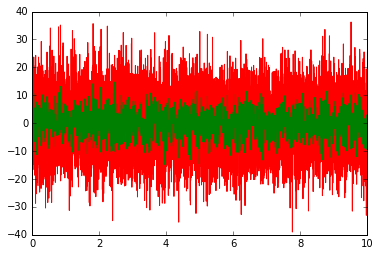

In [1]:
def clearall():
    all = [var for var in globals() if var[0] != "_"]
    for var in all:
        del globals()[var]
import math
import numpy as np
from scipy import signal
tech=0.001
fech=1/tech
fnyquist=fech/2
fc = 90 # on ocupe à 10 Hz
tmax=10 #
gain = 1
f1 = 5 
f2=2*fc
retard1=math.pi/4
retard2=math.pi/3
nech=np.floor(tmax/tech)+1
temps=np.linspace(0,tmax,num=nech)
signal_vrai= gain*np.sin(2*math.pi*f1*temps+retard1) 

gain_bruit=10 ;
bruit=gain_bruit*np.random.randn(nech)
signal_bruite=signal_vrai+ bruit + 0.0*gain*np.sin(2*math.pi*f2*temps+retard2)

ordre=4;
b, a = signal.butter(ordre, fc/fnyquist)
signal_filtre=signal.filtfilt(b,a, signal_bruite)

bord=3*ordre
nechs=nech-2*bord+1
indice_reel=np.linspace(bord, nech-bord,num=nechs)
indice=np.array(indice_reel, int)
t=temps[indice]
sv=signal_vrai[indice]
sb=signal_bruite[indice]
sf=signal_filtre[indice]

import matplotlib.pyplot as plt
%matplotlib inline 
fig = plt.figure()
plt.plot(t, sv,'b',t,sb,'r', t, sf, 'g')

erreur = sf-sv 
somme_carre=np.dot(erreur, erreur.T)
variance_experimentale=somme_carre/nechs
ecart_type_experimental=math.sqrt(variance_experimentale)
print(ecart_type_experimental)


